In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime
import time
import openpyxl
from sklearn.preprocessing import scale
from scipy.signal import savgol_filter

In [870]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [871]:
start_date = "01-03-2014"
end_date = "31-07-2020"
stock_name = "BIMAS"

In [872]:
frame = frame_.loc[frame_["stock_name"] == stock_name]
frame = frame.loc[frame.index > start_date]
frame = frame.loc[frame.index < end_date]

In [873]:
frame

,MA_7,MA_14,MA_20,MA_50,MA_100,MA_200,MA_7_CH,MA_7_CH_CH,MA_14_CH,MA_14_CH_CH,...,RSI_5_CH,Drawdown,marketV_to_bookV,StockValue,StockValue_momentum,market_positive,market_positive_ma_10,stock_name,volume,volume_ma_14
2014-01-06,18.770986,19.037507,19.407470,19.267102,18.921947,19.134346,-0.005073,30.954327,-0.003055,0.027921,...,-0.017700,-0.096212,12.9733,18.9677,91.827922,0.896970,0.427062,BIMAS,34156902.0,3.582343e+07
2014-01-07,18.942329,18.935979,19.338620,19.267990,18.909065,19.130569,-0.004713,30.812239,-0.003562,0.047338,...,-0.021665,-0.108911,12.791,18.7012,92.936300,0.755172,0.486887,BIMAS,33151807.0,3.559498e+07
2014-01-08,18.999443,18.799543,19.247555,19.262658,18.892185,19.126330,-0.004610,30.783978,-0.004270,0.070038,...,-0.025678,-0.123730,12.5783,18.3902,90.590779,0.175000,0.417676,BIMAS,32109594.0,3.350271e+07
2014-01-09,18.764643,18.672621,19.120955,19.248442,18.868642,19.119255,-0.005157,30.805952,-0.004571,0.106755,...,-0.028015,-0.153362,12.1529,17.7683,90.908765,0.272436,0.438632,BIMAS,39122936.0,3.313086e+07
2014-01-10,18.605986,18.574257,19.029890,19.239558,18.851762,19.116092,-0.005379,30.832821,-0.004833,0.161009,...,-0.025647,-0.134312,12.4264,18.1681,92.954280,0.844156,0.513380,BIMAS,28881375.0,3.068669e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,64.535714,64.482143,63.032500,56.869744,53.149772,50.089882,0.006941,0.067276,0.011384,0.325798,...,-0.004346,-0.065217,8.3838,64.5000,102.056962,0.481579,0.512819,BIMAS,290752985.0,2.900089e+08
2020-06-16,64.271429,64.607143,63.550000,57.157744,53.295272,50.177532,0.004838,0.004593,0.010675,0.205044,...,-0.011558,-0.064493,8.3838,64.5500,102.786624,0.829396,0.539963,BIMAS,182799231.0,2.841147e+08
2020-06-17,64.550000,64.953571,64.052500,57.462744,53.463972,50.276882,0.003874,-0.031661,0.010178,0.146335,...,-0.011564,-0.035507,8.3838,66.5500,107.860616,0.424403,0.513070,BIMAS,399178165.0,3.007954e+08
2020-06-18,64.871429,65.107143,64.310000,57.787744,53.622972,50.385232,0.002795,-0.072583,0.009117,0.091306,...,-0.016121,-0.025362,8.3838,67.2500,103.302611,0.583554,0.533244,BIMAS,186500027.0,2.830882e+08


In [874]:
frame["MA_7_50"] = frame["MA_7"] - frame["MA_50"]
frame["MA_14_100"] = frame["MA_14"] - frame["MA_100"]
frame["MA_50_200"] = frame["MA_50"] - frame["MA_200"]

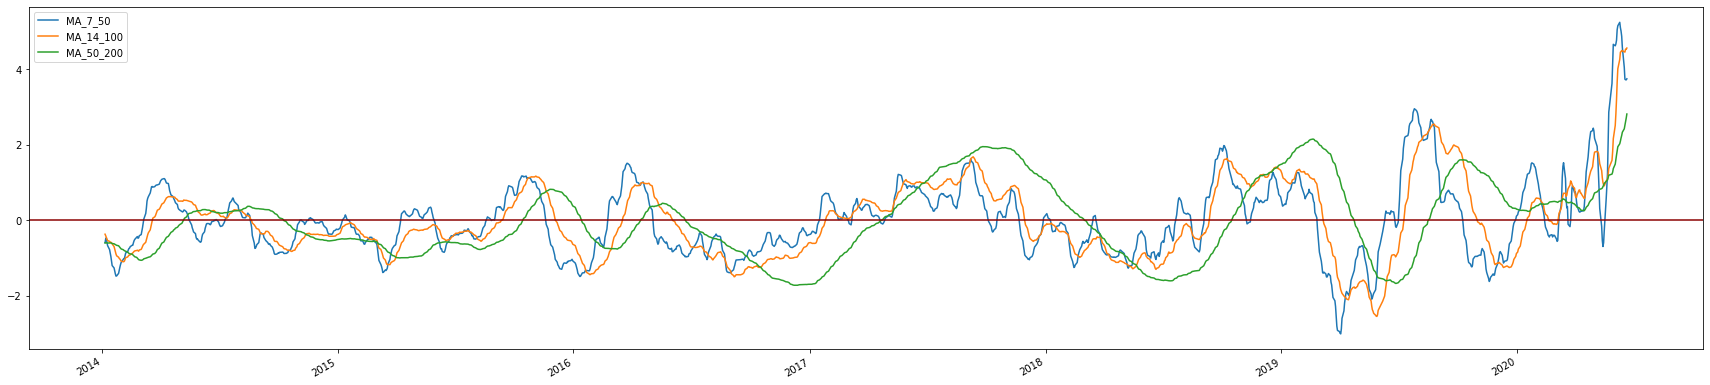

In [875]:
frame["MA_50_200"] = scale(frame["MA_50_200"])
frame["MA_14_100"] = scale(frame["MA_14_100"])
frame["MA_7_50"] = scale(frame["MA_7_50"])

frame[["MA_7_50", "MA_14_100", "MA_50_200"]].plot(figsize=(30,7))
plt.axhline(0, color="darkred")
# plt.axvline(frame.index[1465], color="darkred")
# frame.index[1465]

In [879]:
frame = sm.momentum(frame, "MA_50_200", 5, mode="diff")
frame = sm.momentum(frame, "MA_14_100", 5, mode="diff")
frame = sm.momentum(frame, "MA_7_50", 5, mode="diff")

/Users/mturan/Desktop/Scripts/stock_analysis/stock_module.py:1281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[f"{frame_column}_diff_{momentum_day}"] = frame[f"{frame_column}"].diff(momentum_day)


In [880]:
# 200 --> 50_200_MA
# 100 --> 14_100_MA
# 50  --> 7_50_MA

# 200 alttan keserse al
# 100 üstten keserse sat
# -> 200 üstte ve 50 alttan keserse tekrar al. ve 100 üstten tekrar keserse sat.

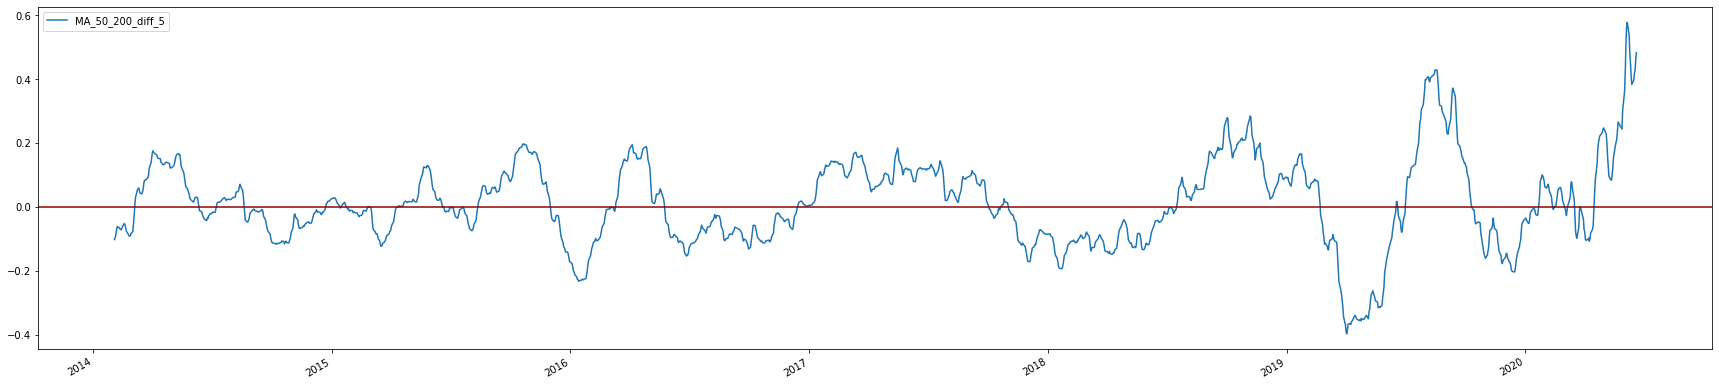

In [881]:
frame[["MA_50_200_diff_5"]].plot(figsize=(30,7))
plt.axhline(0, color="darkred")

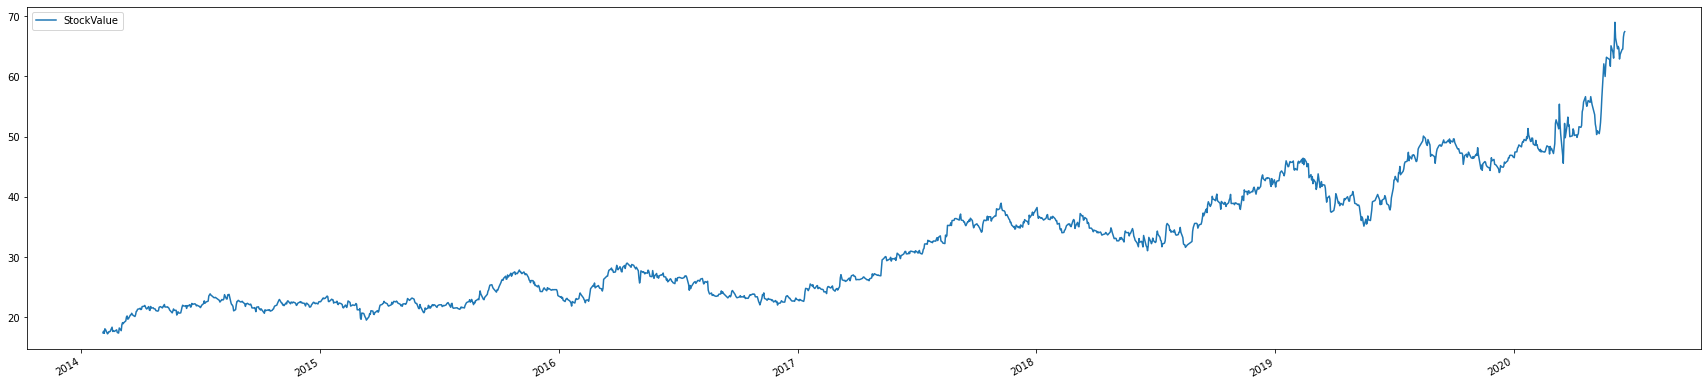

In [882]:
frame[["StockValue"]].plot(figsize=(30,7))

In [883]:
frame['TEST_20_200'] = np.where((frame["MA_50_200_diff_5"] >= -0.1)
                                & (frame["MA_50_200"] >= 0)
                                ,1,0)

In [884]:
frame['TEST_14_100'] = np.where((frame["MA_14_100_diff_5"] >= 0.05)
                                & (frame["MA_14_100"] >= -0.2)
                                ,1,0)

In [885]:
frame['TEST_7_50'] = np.where((frame["MA_7_50_diff_5"] >= 0)
                              & (frame["MA_7_50"] >= -0.3)
                              ,1,0)

In [886]:
frame['TEST_All'] = np.where((frame["MA_7_50"] >= 0)
                           & (frame["MA_14_100"] >= 0)
                           & (frame["MA_50_200"] >= 0)
                            ,"ABOVE_ALL","NOT")

In [887]:
frame['TEST_both_of_3'] = np.where((frame["MA_7_50"] >= 0)
                           & (frame["MA_14_100"] >= 0)
                            ,"ABOVE_2","NOT")

In [888]:
ind = 400
frame[[
    #"MA_7_50_diff_5", "MA_7_50", 
    #"MA_14_100_diff_5", "MA_14_100", 
    #"MA_50_200_diff_5", 
    "MA_50_200", 
       "StockValue", "StockValue_momentum",
       "TEST_7_50", "TEST_14_100", "TEST_20_200", "TEST_both_of_3", "TEST_All"]].iloc[ind:ind+20,:]

,MA_50_200,StockValue,StockValue_momentum,TEST_7_50,TEST_14_100,TEST_20_200,TEST_both_of_3,TEST_All
2015-09-04,-0.581058,23.8933,105.651042,1,1,0,NOT,NOT
2015-09-07,-0.572084,23.1858,101.195007,1,1,0,NOT,NOT
2015-09-08,-0.561502,22.9804,102.129664,1,1,0,NOT,NOT
2015-09-09,-0.554540,22.9120,101.108076,1,1,0,NOT,NOT
2015-09-10,-0.545300,23.2999,101.491010,1,1,0,NOT,NOT
2015-09-11,-0.535341,23.4140,105.991743,0,1,0,NOT,NOT
2015-09-14,-0.522536,23.8020,105.888319,0,1,0,ABOVE_2,NOT
2015-09-15,-0.505951,24.3268,108.775146,0,1,0,ABOVE_2,NOT
2015-09-16,-0.485837,24.5094,107.723209,1,1,0,ABOVE_2,NOT
2015-09-17,-0.463239,24.9658,109.619319,1,1,0,ABOVE_2,NOT


In [889]:
frame["TEST_three"] = frame[["TEST_7_50", "TEST_14_100", "TEST_20_200"]].sum(axis=1)

In [890]:
frame['BUY_1'] = np.where((frame["TEST_both_of_3"] == "ABOVE_2")
                              & (frame["TEST_three"] >= 2)
                              , 1, 0)

In [891]:
frame['BUY_2'] = np.where((frame["TEST_All"] == "ABOVE_ALL")
                              & (frame["TEST_three"] >= 1)
                              , 1, 0)

In [892]:
frame['BUY_total'] = np.where((frame["BUY_1"] == 1)
                              | (frame["BUY_2"] == 1)
                              , 1, 0)

In [893]:
ind = 580
frame[[
    #"MA_7_50_diff_5", "MA_7_50", 
    #"MA_14_100_diff_5", "MA_14_100", 
    #"MA_50_200_diff_5", 
    "MA_50_200",
    "StockValue", "StockValue_momentum",
    "TEST_7_50", "TEST_14_100", "TEST_20_200", "TEST_All","TEST_both_of_3",
    "BUY_total"
]].iloc[ind:ind+20,:]

,MA_50_200,StockValue,StockValue_momentum,TEST_7_50,TEST_14_100,TEST_20_200,TEST_All,TEST_both_of_3,BUY_total
2016-05-20,0.446537,26.7880,94.642863,0,0,1,NOT,NOT,0
2016-05-23,0.437861,26.7420,96.437420,0,0,1,NOT,NOT,0
2016-05-24,0.434084,27.7529,104.770228,0,0,1,NOT,NOT,0
2016-05-25,0.425033,27.0636,105.366515,0,0,1,NOT,NOT,0
2016-05-26,0.412433,26.4663,100.875495,0,0,1,NOT,NOT,0
2016-05-27,0.397692,26.8569,96.932172,0,0,1,NOT,NOT,0
2016-05-30,0.382324,27.2704,99.330521,0,0,1,NOT,NOT,0
2016-05-31,0.361213,26.6042,96.500067,0,0,1,NOT,NOT,0
2016-06-01,0.339273,26.8339,97.986511,0,0,1,NOT,NOT,0
2016-06-02,0.318896,26.4893,97.381762,0,0,1,NOT,NOT,0


In [894]:
locations = []
start = 0
for row in range(frame.shape[0]-1):
    if frame.BUY_total[row] == 1:
        if (frame.BUY_total[row] == 1 and frame.BUY_total[row+1] == 0):
            end = row+1
            loc = [start, end]
            locations.append(loc)

    else:
        if (frame.BUY_total[row] == 0 and frame.BUY_total[row+1] == 1):
            start = row+1

In [895]:
rets = []
for obs in locations:
    ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
    rets.append(ret)

In [896]:
frame.iloc[:,30:]

,volume_ma_14,MA_7_50,MA_14_100,MA_50_200,MA_50_200_diff_5,MA_14_100_diff_5,MA_7_50_diff_5,TEST_20_200,TEST_14_100,TEST_7_50,TEST_All,TEST_both_of_3,TEST_three,BUY_1,BUY_2,BUY_total
2014-02-03,4.688329e+07,-1.037909,-1.092778,-0.774009,-0.102388,-0.117371,0.362615,0,0,0,NOT,NOT,0,0,0,0
2014-02-04,4.713498e+07,-1.012146,-1.093817,-0.788813,-0.094815,-0.086206,0.299401,0,0,0,NOT,NOT,0,0,0,0
2014-02-05,4.649183e+07,-1.007534,-1.076610,-0.801972,-0.088175,-0.053812,0.229402,0,0,0,NOT,NOT,0,0,0,0
2014-02-06,4.500955e+07,-0.928512,-1.028507,-0.809490,-0.072892,0.023899,0.236982,0,0,0,NOT,NOT,0,0,0,0
2014-02-07,4.393007e+07,-0.859812,-0.986689,-0.817979,-0.061922,0.092049,0.251706,0,0,0,NOT,NOT,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,2.900089e+08,4.049965,4.462773,2.423184,0.396233,0.202890,-1.191425,1,1,0,ABOVE_ALL,ABOVE_2,2,1,1,1
2020-06-16,2.841147e+08,3.735945,4.453949,2.514165,0.417871,0.001943,-1.363705,1,0,0,ABOVE_ALL,ABOVE_2,1,0,1,1
2020-06-17,3.007954e+08,3.720918,4.530450,2.607553,0.428111,0.065224,-1.288328,1,1,0,ABOVE_ALL,ABOVE_2,2,1,1,1
2020-06-18,2.830882e+08,3.718887,4.528113,2.705935,0.459422,0.033125,-1.153655,1,0,0,ABOVE_ALL,ABOVE_2,1,0,1,1


In [897]:
starts=[]
ends=[]
for row in range(frame.shape[0]-1):

    if frame.TEST[row+1] == "buy":
        if (frame.TEST[row+1] == "buy" and frame.TEST[row] == "sell"):
            start = row+1
            starts.append(start)
            
    if frame.TEST2[row+1] == "sell":
        if (frame.TEST2[row+1] == "sell" and frame.TEST2[row] == "buy"):
            end = row+1
            ends.append(end)

AttributeError: 'DataFrame' object has no attribute 'TEST'

In [898]:
ends

[]

In [899]:
starts

[]

Kısa süre içerisinde sell gelirse bekle ve stop loss çalıştır (%5)

Timestamp('2019-11-19 00:00:00')

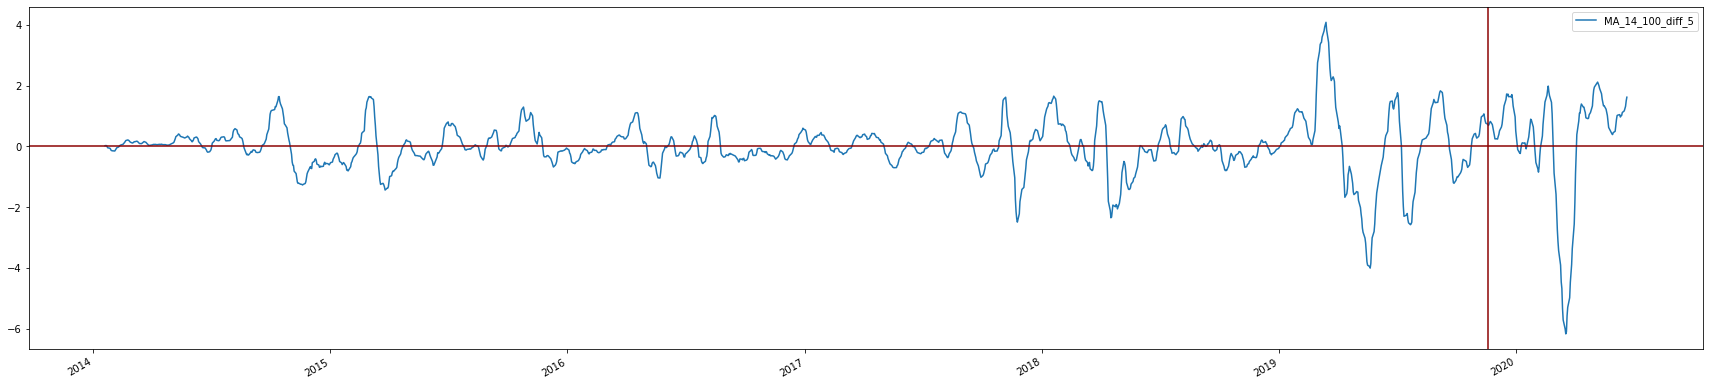

In [950]:
frame[["MA_14_100_diff_5"]].plot(figsize=(30,7))
plt.axhline(0, color="darkred")
plt.axvline(frame.index[1465], color="darkred")
frame.index[1465]

Timestamp('2019-11-12 00:00:00')

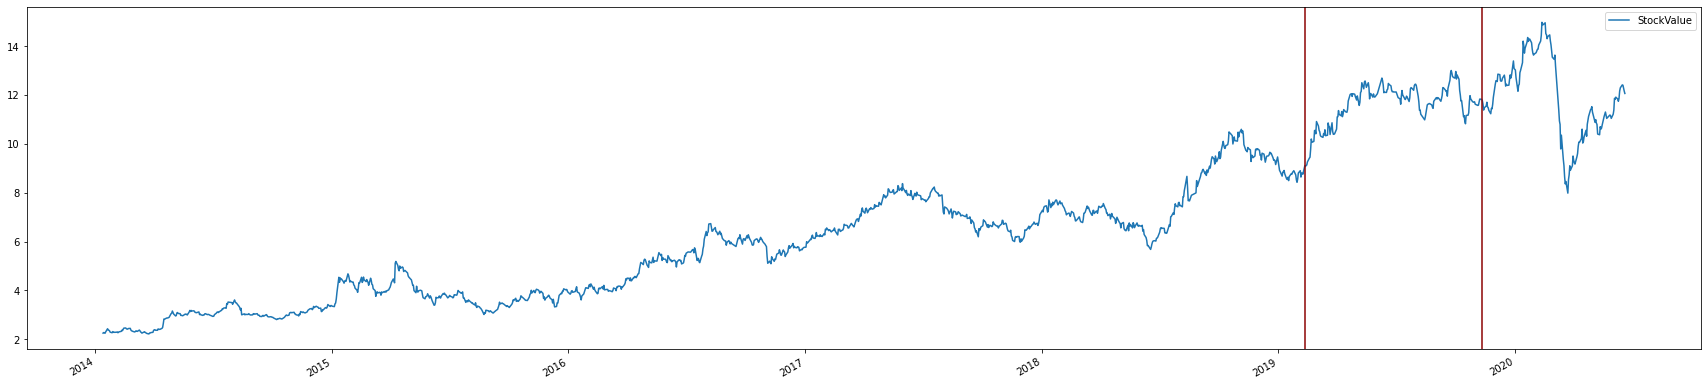

In [632]:
frame[["StockValue"]].plot(figsize=(30,7))
plt.axvline(frame.index[1280], color="darkred")
plt.axvline(frame.index[1465], color="darkred")
frame.index[1465]

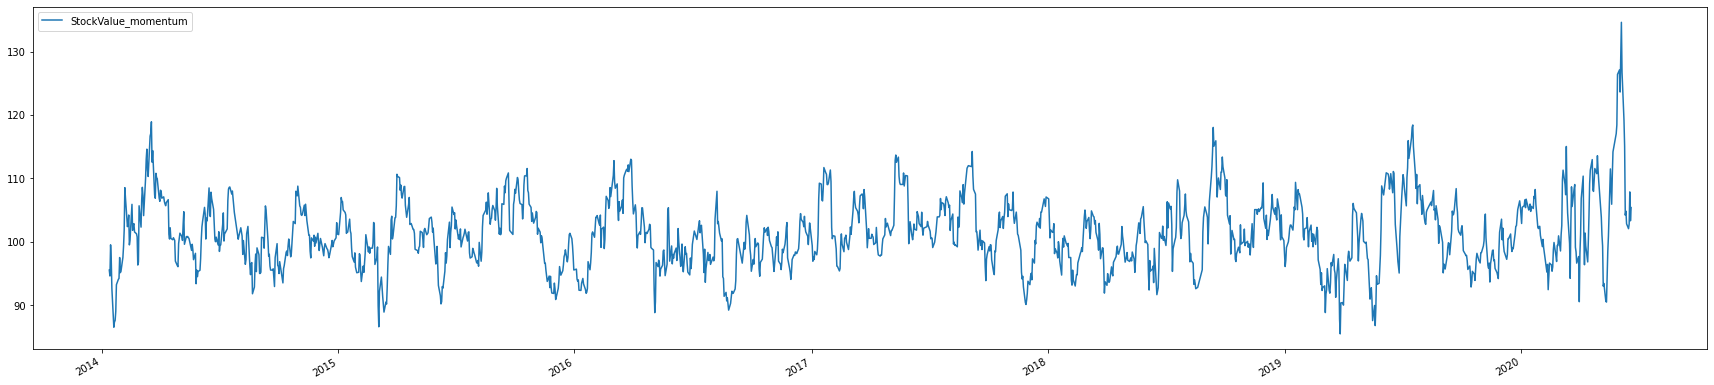

In [573]:
frame[["StockValue_momentum"]].plot(figsize=(30,7))

In [872]:
fourth = sm.filter_financials(["turnover", "ebitda", "gross_profit", "roe", "cash_ratio"], 12, 2, 5)

Reference year to move back: 2014/12
Reference year to move back: 2014/12
Reference year to move back: 2014/12
Reference year to move back: 2014/12
Reference year to move back: 2014/12


In [873]:
fifth = sm.filter_financials(["turnover", "ebitda", "gross_profit", "roe", "cash_ratio"], 12, 2, 4)

Reference year to move back: 2015/12
Reference year to move back: 2015/12
Reference year to move back: 2015/12
Reference year to move back: 2015/12
Reference year to move back: 2015/12


In [874]:
sixth = sm.filter_financials(["turnover", "ebitda", "gross_profit", "roe", "cash_ratio"], 12, 2, 3)

Reference year to move back: 2016/12
Reference year to move back: 2016/12
Reference year to move back: 2016/12
Reference year to move back: 2016/12
Reference year to move back: 2016/12


In [5]:
seventh = sm.filter_financials(["turnover", "ebitda", "gross_profit", "roe", "cash_ratio"], 12, 2, 2)

Reference year to move back: 2017/12
Reference year to move back: 2017/12
Reference year to move back: 2017/12
Reference year to move back: 2017/12
Reference year to move back: 2017/12


In [3]:
eigth = sm.filter_financials(["turnover", "ebitda", "gross_profit", "roe", "cash_ratio"], 12, 2, 1)

Reference year to move back: 2018/12
Reference year to move back: 2018/12
Reference year to move back: 2018/12
Reference year to move back: 2018/12
Reference year to move back: 2018/12


In [2]:
ninth = sm.filter_financials(["turnover", "ebitda", "gross_profit", "roe", "cash_ratio"], 12, 2, 0)

Reference year to move back: 2019/12
Reference year to move back: 2019/12
Reference year to move back: 2019/12
Reference year to move back: 2019/12
Reference year to move back: 2019/12


In [6]:
seventh

['FROTO', 'DEVA', 'BRKSN', 'YATAS', 'SUMAS', 'TKFEN']

---
### NOISE

In [718]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [817]:
start_date = "01-03-2014"
end_date = "28-02-2019"
stock_name = "IPEKE"

In [818]:
frame = frame_.loc[frame_["stock_name"] == stock_name]
frame = frame.loc[frame.index > start_date]
frame = frame.loc[frame.index < end_date]

In [819]:
frame["MA_7_50"] = frame["MA_7"] - frame["MA_50"]
frame["MA_14_100"] = frame["MA_14"] - frame["MA_100"]
frame["MA_50_200"] = frame["MA_50"] - frame["MA_200"]

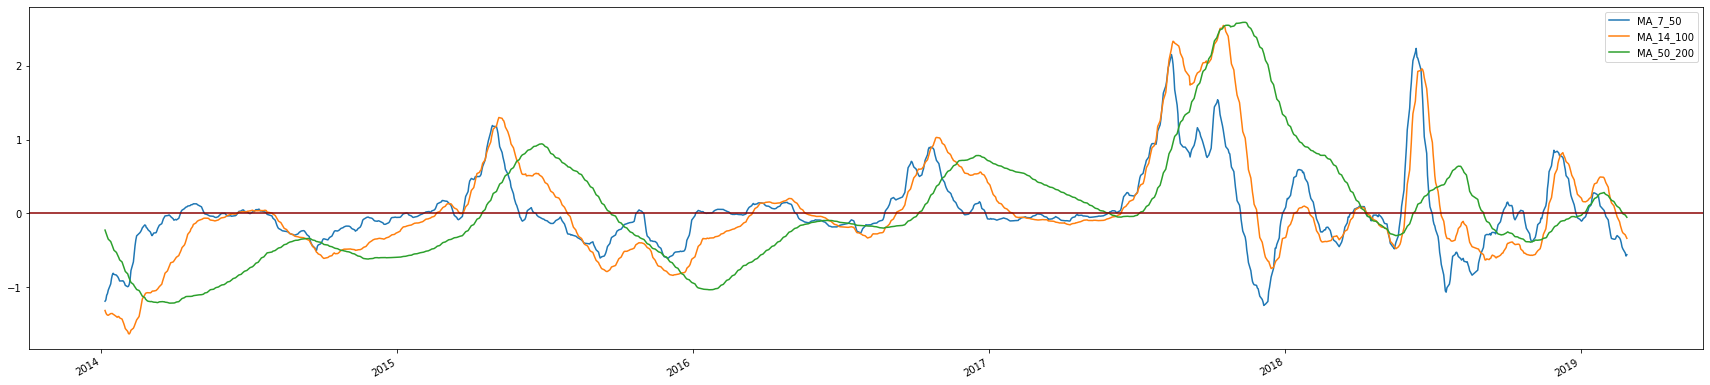

In [820]:
# frame["MA_50_200"] = scale(frame["MA_50_200"])
# frame["MA_14_100"] = scale(frame["MA_14_100"])
# frame["MA_7_50"] = scale(frame["MA_7_50"])

frame[["MA_7_50", "MA_14_100", "MA_50_200"]].plot(figsize=(30,7))
plt.axhline(0, color="darkred")

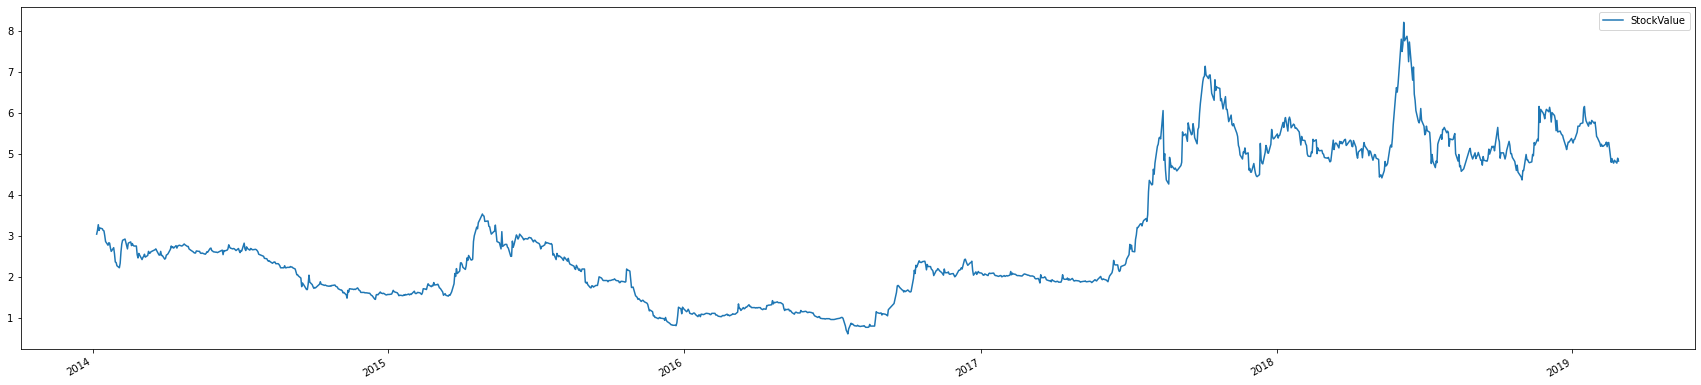

In [821]:
frame[["StockValue"]].plot(figsize=(30,7))

In [822]:
w_out_noise = savgol_filter(frame["StockValue"], 401, 2)

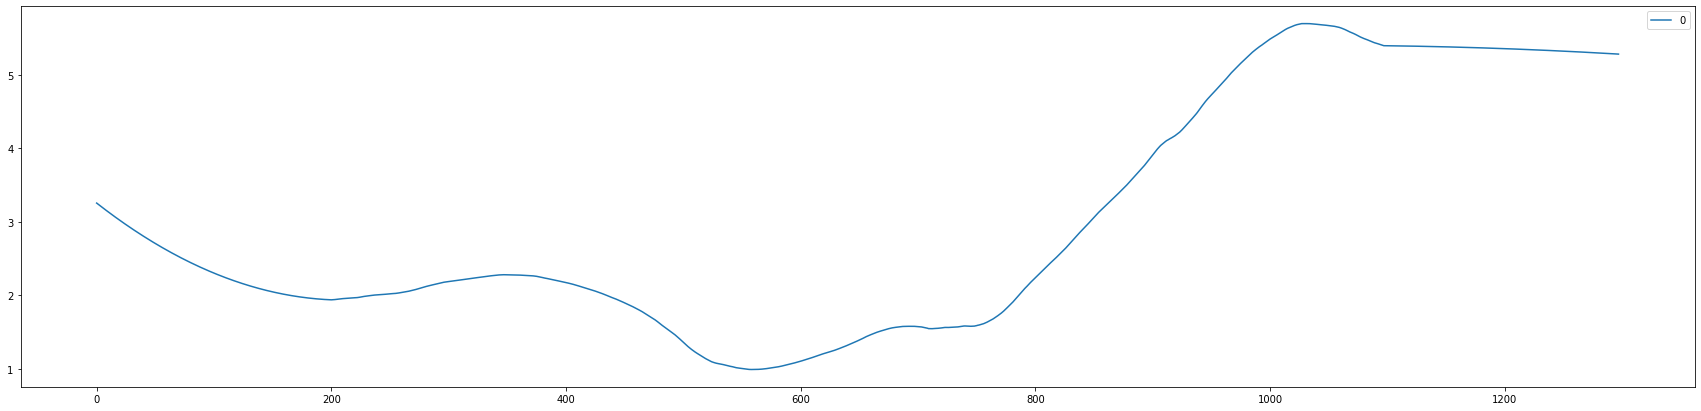

In [823]:
pd.DataFrame(w_out_noise).plot(figsize=(30,7))

In [824]:
frame["StockValue"] = w_out_noise

In [825]:
frame_f = frame[["StockValue"]]

In [826]:
MA_7 = sm.short_moving_average(frame_f, 7)["StockValue"]
MA_7 = pd.DataFrame(MA_7)
MA_7 = MA_7.rename(columns={"StockValue": "MA_7"})

In [827]:
MA_14 = sm.short_moving_average(frame_f, 14)["StockValue"]
MA_14 = pd.DataFrame(MA_14)
MA_14 = MA_14.rename(columns={"StockValue": "MA_14"})

In [828]:
MA_20 = sm.short_moving_average(frame_f, 20)["StockValue"]
MA_20 = pd.DataFrame(MA_20)
MA_20 = MA_20.rename(columns={"StockValue": "MA_20"})

In [829]:
MA_50 = sm.short_moving_average(frame_f, 50)["StockValue"]
MA_50 = pd.DataFrame(MA_50)
MA_50 = MA_50.rename(columns={"StockValue": "MA_50"})

In [830]:
MA_100 = sm.short_moving_average(frame_f, 100)["StockValue"]
MA_100 = pd.DataFrame(MA_100)
MA_100 = MA_100.rename(columns={"StockValue": "MA_100"})

In [831]:
MA_200 = sm.short_moving_average(frame_f, 200)["StockValue"]
MA_200 = pd.DataFrame(MA_200)
MA_200 = MA_200.rename(columns={"StockValue": "MA_200"})

In [832]:
MA_200 = MA_200.join(MA_100)
MA_200 = MA_200.join(MA_50)
MA_200 = MA_200.join(MA_20)
MA_200 = MA_200.join(MA_14)
MA_200 = MA_200.join(MA_7)

In [833]:
new_frame = MA_200

In [834]:
new_frame["MA_7_50"] = new_frame["MA_7"] - new_frame["MA_50"]
new_frame["MA_14_100"] = new_frame["MA_14"] - new_frame["MA_100"]
new_frame["MA_50_200"] = new_frame["MA_50"] - new_frame["MA_200"]

In [835]:
new_frame["MA_50_200"] = scale(new_frame["MA_50_200"])
new_frame["MA_14_100"] = scale(new_frame["MA_14_100"])
new_frame["MA_7_50"] = scale(new_frame["MA_7_50"])

In [836]:
frame = frame_.loc[frame_["stock_name"] == stock_name]
frame = frame.loc[frame.index > start_date]
frame = frame.loc[frame.index < end_date]

In [837]:
frame = frame[["StockValue"]]

In [838]:
new_frame = new_frame.join(frame)

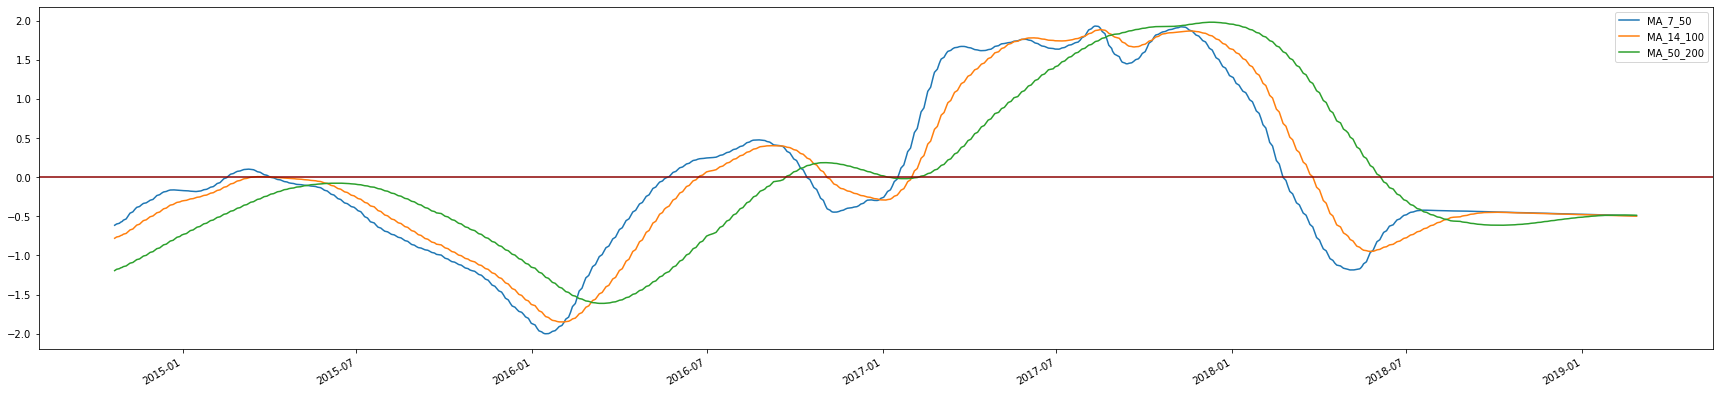

In [839]:
new_frame[["MA_7_50", "MA_14_100", "MA_50_200"]].plot(figsize=(30,7))
plt.axhline(0, color="darkred")

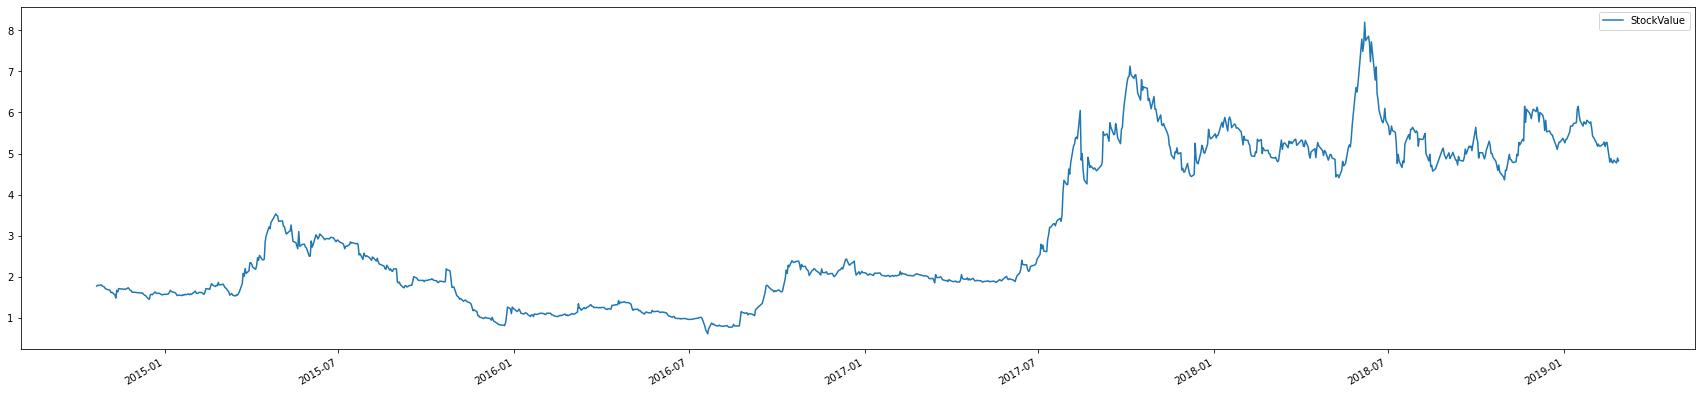

In [840]:
new_frame[["StockValue"]].plot(figsize=(30,7))

In [841]:
new_frame[["MA_7_50", "MA_14_100", "MA_50_200", "StockValue"]].iloc[590:,:]

,MA_7_50,MA_14_100,MA_50_200,StockValue
2017-02-21,1.199628,0.497743,0.062040,2.02
2017-02-22,1.248931,0.535509,0.071043,2.04
2017-02-23,1.295993,0.573343,0.080634,2.06
2017-02-24,1.338714,0.610661,0.090734,2.07
2017-02-27,1.378877,0.647744,0.101381,2.05
...,...,...,...,...
2019-02-21,-0.491569,-0.496464,-0.485411,4.77
2019-02-22,-0.492041,-0.496956,-0.485794,4.84
2019-02-25,-0.492514,-0.497447,-0.486222,4.77
2019-02-26,-0.492987,-0.497938,-0.486704,4.89


In [842]:
new_frame['rec_1'] = np.where((new_frame['MA_7_50'] > new_frame["MA_50_200"])
                                         , "BUY", "SELL")

In [843]:
new_frame['rec_2'] = np.where((new_frame['MA_14_100'] > new_frame["MA_50_200"])
                                         , "BUY", "SELL")

In [844]:
loc_first=[]
for row in range(new_frame.shape[0]-1):

        if new_frame.rec_1[row] == "SELL":
            if new_frame.rec_1[row+1] == "BUY":
                start = row+1
                loc_first.append(start)

        if new_frame.rec_1[row] == "BUY":
            if new_frame.rec_1[row+1] == "SELL":
                end = row+2
                loc_first.append(end)

In [845]:
loc_second=[]
for row in range(new_frame.shape[0]-1):

    if new_frame.rec_2[row] == "SELL":
        if new_frame.rec_2[row+1] == "BUY":
            start = row+1
            loc_second.append(start)
            
    if new_frame.rec_2[row] == "BUY":
        if new_frame.rec_2[row+1] == "SELL":
            end = row+2
            loc_second.append(end)

In [846]:
loc_first

[141, 335, 495, 565, 718, 945, 1082]

In [847]:
loc_second

[155, 346, 504, 575, 722, 964, 1077]

In [848]:
def get_transactions(new_frame, column, locations):
    if new_frame.iloc[0,:][str(column)] == "SELL":
        transactions = [[locations[buy], locations[sell]] for buy, sell in zip(range(0,len(locations),2), range(1,len(locations),2))]
    else:
        transactions = [[locations[buy], locations[sell]] for buy, sell in zip(range(1,len(locations),2), range(2,len(locations),2))]
        transactions.insert(0, [0, locations[0]])

    return transactions

In [849]:
first_transactions = get_transactions(new_frame, "rec_1", loc_first)
first_transactions

[[0, 141], [335, 495], [565, 718], [945, 1082]]

In [850]:
second_transactions = get_transactions(new_frame, "rec_2", loc_second)
second_transactions

[[0, 155], [346, 504], [575, 722], [964, 1077]]

In [851]:
def returns(new_frame, list_of_transactions):
    returns = []
    for transactions in list_of_transactions:
        buy = new_frame.iloc[transactions[0]:transactions[1],:]["StockValue"][0]
        sell = new_frame.iloc[transactions[0]:transactions[1],:]["StockValue"][-1]
        ret = (sell-buy)/buy
        returns.append(ret)
    
    return returns

In [852]:
first_transactions

[[0, 141], [335, 495], [565, 718], [945, 1082]]

In [853]:
first_returns = returns(new_frame, first_transactions)
first_returns

[0.7570621468926553,
 0.8666666666666666,
 1.2966507177033493,
 0.1004184100418409]

In [854]:
second_transactions

[[0, 155], [346, 504], [575, 722], [964, 1077]]

In [855]:
second_returns = returns(new_frame, second_transactions)
second_returns

[0.4124293785310734,
 1.1743119266055044,
 1.313432835820896,
 0.15261044176706823]

In [856]:
new_frame.shape[0]

1099

In [857]:
sum([t[1]-t[0] for t in first_transactions])

591

In [858]:
sum([t[1]-t[0] for t in second_transactions])

573

In [859]:
def prod(list_of_all_returns):
    return np.prod([ret+1 for ret in list_of_all_returns]) 

In [860]:
first_cum_return = prod(first_returns)
first_cum_return

8.28908692100179

In [861]:
second_cum_return  = prod(second_returns)
second_cum_return

8.18894653197882

In [862]:
totalReturn = (first_cum_return + second_cum_return) / 2
totalReturn

8.239016726490306

In [863]:
new_frame.iloc[-30:,:]

,MA_200,MA_100,MA_50,MA_20,MA_14,MA_7,MA_7_50,MA_14_100,MA_50_200,StockValue,rec_1,rec_2
2019-01-17,5.380410,5.345369,5.329042,5.317747,5.315353,5.312504,-0.479746,-0.484180,-0.494033,5.92,BUY,BUY
2019-01-18,5.379057,5.344714,5.328293,5.316942,5.314537,5.311674,-0.480219,-0.484672,-0.492893,5.80,BUY,BUY
2019-01-21,5.377732,5.344055,5.327541,5.316134,5.313717,5.310841,-0.480692,-0.485163,-0.491814,5.67,BUY,BUY
2019-01-22,5.376439,5.343393,5.326785,5.315321,5.312894,5.310005,-0.481165,-0.485654,-0.490801,5.77,BUY,BUY
2019-01-23,5.375178,5.342727,5.326025,5.314505,5.312066,5.309164,-0.481638,-0.486146,-0.489856,5.74,BUY,BUY
2019-01-24,5.373952,5.342057,5.325261,5.313685,5.311235,5.308320,-0.482111,-0.486637,-0.488983,5.72,BUY,BUY
2019-01-25,5.372764,5.341383,5.324494,5.312862,5.310401,5.307472,-0.482584,-0.487128,-0.488191,5.81,BUY,BUY
2019-01-28,5.371615,5.340706,5.323723,5.312035,5.309562,5.306621,-0.483056,-0.487620,-0.487478,5.74,BUY,SELL
2019-01-29,5.370504,5.340024,5.322948,5.311204,5.308720,5.305765,-0.483529,-0.488111,-0.486844,5.77,BUY,SELL
2019-01-30,5.369428,5.339339,5.322170,5.310369,5.307874,5.304906,-0.484002,-0.488602,-0.486284,5.62,BUY,SELL


In [815]:
2019-11-25

1983

In [767]:
2020-05-12

SyntaxError: invalid token (<ipython-input-767-c5d251e6210c>, line 1)

In [ ]:
2019-01-30 5.6 - 6.93